In [39]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *

from sklearn import model_selection

# Вопрос 4
Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [10]:
m0 = 9.5
n = 160
m1 = 9.57
sigma = 0.4

$H_0\colon$ средний уровень кальция в этой популяции не отличается от 9.5.

$H_1\colon$ отличается.

In [22]:
# observed_data = stats.norm.rvs(loc=9.57, scale=0.4, size=n, random_state=None)
# stats.ttest_1samp(observed_data, 9.5)

Ttest_1sampResult(statistic=3.3839691052301752, pvalue=0.0008998071653274639)

$Z (X_n) = (X¯−µ_0)/(σ/√n)$


$Z (X_n) ∼ N(0, 1)$

In [21]:
z = (m1-m0)/(sigma/(np.sqrt(n)))
print('z: ', z)
print('𝐹𝑁(0,1)(|𝑧|): ', stats.norm.cdf(abs(z)))
p = 2*(1-stats.norm.cdf(abs(z)))
print('p: ', p)

z:  2.213594362117875
𝐹𝑁(0,1)(|𝑧|):  0.9865716522462381
p:  0.026856695507523787


# Вопрос 6
Имеются данные о стоимости и размерах 53940 бриллиантов:

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.cross_validation.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

- линейную регрессию с помощью LinearRegression без параметров
- случайный лес из 10 деревьев с помощью RandomForestRegressor с random_state=1

Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости \alpha=0.05α=0.05?

In [31]:
data = pd.read_csv('diamonds.txt', delimiter='\t')

In [50]:
data.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [40]:
train, test = model_selection.train_test_split(data, random_state = 1)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [48]:
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=10, random_state=1)

In [49]:
model_lr = lr.fit(train.drop('price', axis=1), train['price'])
model_rf = rf.fit(train.drop('price', axis=1), train['price'])

In [51]:
lr_preds = model_lr.predict(test.drop('price', axis=1))
rf_preds = model_rf.predict(test.drop('price', axis=1))

In [55]:
lr_ae = test.price - lr_preds
rf_ae = test.price - rf_preds

(array([5.000e+00, 8.000e+00, 1.800e+01, 5.800e+01, 1.430e+02, 3.430e+02,
        7.540e+02, 2.280e+03, 7.999e+03, 9.990e+02, 4.000e+02, 2.310e+02,
        1.290e+02, 6.200e+01, 2.800e+01, 1.200e+01, 7.000e+00, 3.000e+00,
        4.000e+00, 2.000e+00]),
 array([-8878.7  , -7812.585, -6746.47 , -5680.355, -4614.24 , -3548.125,
        -2482.01 , -1415.895,  -349.78 ,   716.335,  1782.45 ,  2848.565,
         3914.68 ,  4980.795,  6046.91 ,  7113.025,  8179.14 ,  9245.255,
        10311.37 , 11377.485, 12443.6  ]),
 <a list of 20 Patch objects>)

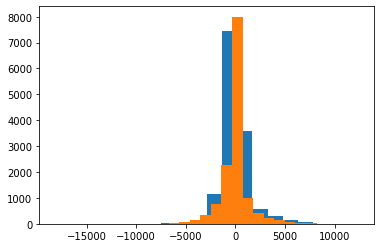

In [59]:
import matplotlib.pyplot as plt
plt.hist(lr_ae, bins=20)
plt.hist(rf_ae, bins=20)

(array([4447., 1782., 1431., 1026., 1135.,  726.,  569.,  397.,  307.,
         294.,  230.,  210.,  166.,  148.,  118.,  126.,   96.,   96.,
          96.,   85.]),
 array([  327.  ,  1250.85,  2174.7 ,  3098.55,  4022.4 ,  4946.25,
         5870.1 ,  6793.95,  7717.8 ,  8641.65,  9565.5 , 10489.35,
        11413.2 , 12337.05, 13260.9 , 14184.75, 15108.6 , 16032.45,
        16956.3 , 17880.15, 18804.  ]),
 <a list of 20 Patch objects>)

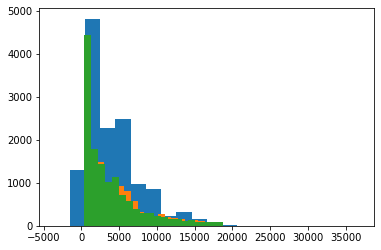

In [60]:
plt.hist(lr_preds, bins=20)
plt.hist(rf_preds, bins=20)
plt.hist(test.price, bins=20)

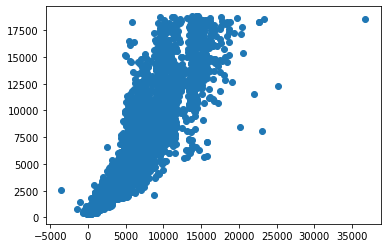

In [66]:
plt.scatter(lr_preds, test.price)

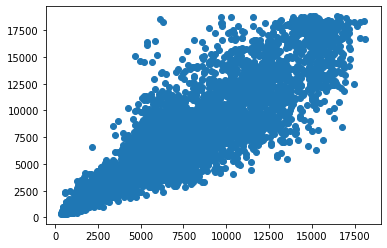

In [63]:
plt.scatter(rf_preds, test.price)

In [64]:
mean_lr_ae = lr_ae.mean()
mean_rf_ae = rf_ae.mean()

In [65]:
print(mean_lr_ae, mean_rf_ae)

-19.22923539450825 -47.97072766063097


# Двухвыборочный критерий Стьюдента (зависмые выборки)

Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости \alpha=0.05α=0.05?

In [67]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/elenaskorobogatova/Anaconda/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


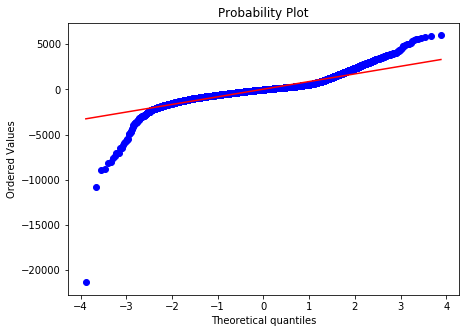

In [74]:
pylab.figure(figsize=(7,5))
stats.probplot(lr_ae-rf_ae, dist="norm", plot=pylab)
pylab.show()

In [75]:
stats.ttest_rel(lr_ae, rf_ae)

Ttest_relResult(statistic=3.6320745260884557, pvalue=0.0002821946648414468)

ответ: отвергается, p < 0.05

# Вопрос 7
В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [76]:
print("95%% confidence interval: [%f, %f]" % DescrStatsW(lr_ae - rf_ae).tconfint_mean())

95% confidence interval: [13.230427, 44.252558]
